In [10]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest


In [2]:
np.random.seed(42)
n_A, p_A =10_000 ,0.10
n_B ,p_B =10_000 ,0.12
success_A =np.random.binomial(n_A,p_A)
success_B =np.random.binomial(n_B,p_B)

In [3]:
def proportion_ci(successes ,n, alpha=0.05):
  p_hat=successes/n
  z=stats.norm.ppf(1-alpha/2)
  se=np.sqrt(p_hat*(1-p_hat)/n)
  return p_hat, p_hat - z*se,p_hat + z*se

p_A_hat,ci_low_A,ci_high_A=proportion_ci(success_A,n_A)
p_B_hat,ci_low_B,ci_high_B=proportion_ci(success_B,n_B)


results=pd.DataFrame({
    'variant':['A','B'],
    'visitors':[n_A,n_B],
    'conversion':[success_A,success_B],
    'CR(^p)':[p_A_hat,p_B_hat],
    'CI_low':[ci_low_A,ci_low_B],
    'CI_high':[ci_high_A,ci_high_B]
})
print(results)


  variant  visitors  conversion  CR(^p)    CI_low   CI_high
0       A     10000         973  0.0973  0.091491  0.103109
1       B     10000        1134  0.1134  0.107185  0.119615


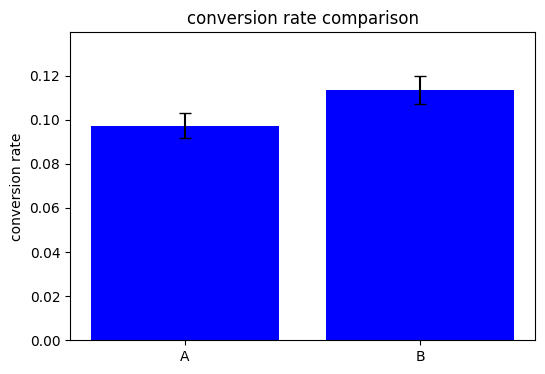

In [4]:
plt.figure(figsize=(6,4))
plt.bar(
    results['variant'],
    results['CR(^p)'],
    yerr=[
          results['CR(^p)']-results['CI_low'],
          results['CI_high']-results['CR(^p)']
    ],
    capsize=4,
    color='blue'
)




plt.ylabel('conversion rate')
plt.title('conversion rate comparison')
plt.ylim(0,max(results['CI_high'])+0.02)
plt.show()

In [11]:
count=np.array([success_A,success_B])
nobs=np.array([n_A,n_B])

z_stat,p_value=proportions_ztest(count,nobs,alternative='larger')
print(f"Z-stats:{z_stat:.3f}")
print(f'p-value:{p_value:.3f}')

if p_value<0.05:
  print('Reject the null hypothesis')
else:
  print('Fail to reject the null hypothesis')

NameError: name 'success_A' is not defined

In [4]:
import numpy as np ,matplotlib.pyplot as plt ,time
from statsmodels.stats.proportion import proportions_ztest
from IPython.display import clear_output

true_p_A,true_p_B=0.10,0.12
batch_size=100
n_batches=60


n_visits_A=0
n_visitis_B=0
n_succ_A=n_succ_B=0

batches=[]
p_value=[]
lifts=[]

In [8]:
for batch in range(1,n_batches+1):
  new_A=np.random.binomial(batch_size,true_p_A)
  new_B=np.random.binomial(batch_size,true_p_B)

  #update totals
  n_visits_A +=batch_size
  n_visitis_B +=batch_size
  n_succ_A +=new_A
  n_succ_B +=new_B


  cr_A=n_succ_A/n_visits_A
  cr_B=n_succ_B/n_visitis_B
  lift=cr_B-cr_A

  count=np.array([n_succ_A,n_succ_B])
  nobs=np.array([n_visitis_B,n_visits_A])
  z_stat,p_val=proportions_ztest(count,nobs,alternative='larger')

  batches.append(batch)
  # p_value.append(p_val)
  p_value.append(p_val)
  lifts.append(lift)

  clear_output(wait=True)

In [9]:
p_value

[np.float64(0.9999909488105273),
 np.float64(0.9999873415019729),
 np.float64(0.9999856585943673),
 np.float64(0.999986924068761),
 np.float64(0.999982977681831),
 np.float64(0.9999920027690117),
 np.float64(0.9999953573408346),
 np.float64(0.9999966602650021),
 np.float64(0.9999958731329256),
 np.float64(0.9999956088284603),
 np.float64(0.9999963470618769),
 np.float64(0.999996937310866),
 np.float64(0.9999982606195265),
 np.float64(0.9999987691910363),
 np.float64(0.9999988855581433),
 np.float64(0.9999989255991665),
 np.float64(0.9999988609961297),
 np.float64(0.9999993535097919),
 np.float64(0.9999995067460168),
 np.float64(0.9999993316908039),
 np.float64(0.9999993402300167),
 np.float64(0.9999993548263497),
 np.float64(0.9999992438650293),
 np.float64(0.9999991237831904),
 np.float64(0.9999992133613598),
 np.float64(0.999999097805867),
 np.float64(0.9999993066904544),
 np.float64(0.9999993285509865),
 np.float64(0.9999993889274693),
 np.float64(0.9999994893452075),
 np.float64(0.